
RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



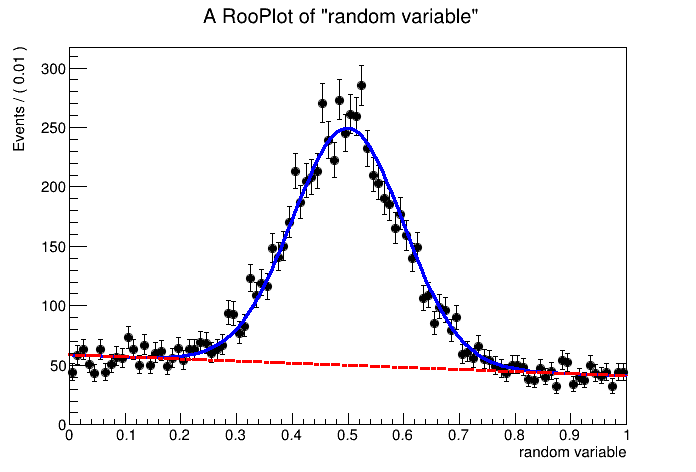

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (linear)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [1]:
using namespace RooFit;

// observable
RooRealVar x("x", "random variable", 0.0, 1.0);
    
// Gaussian model
RooRealVar mu("mu", "mean parameter", 0.5, 0.0, 1.0);
RooRealVar sigma("sigma", "width parameter", 0.1, 0.0, 0.3);
RooGaussian gaus("gaus", "Gaussian PDF", x, mu, sigma);
    
// Linear function: 1 + slope*x
RooRealVar slope("slope", "slope parameter", -0.3, -10., 10.);
RooPolynomial linear("linear", "Linear function", x, RooArgSet(slope));
    
// add up: Gaussian + linear
RooRealVar fraction("fraction","fraction of Gaussian",0.5,0.,1.);
RooAddPdf model("model","PDF model", RooArgList(gaus,linear), RooArgList(fraction));
    
// generate random data, plot
RooDataSet *data = model.generate(x, 10000);
RooPlot* frame = x.frame();
data->plotOn(frame);
model.plotOn(frame);
model.plotOn(frame,Components(linear),LineStyle(7),LineColor(kRed));
frame->Draw() ;
c1->Draw() ;
